In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('cluster_data.csv')

In [3]:
df.shape

(2300, 2)

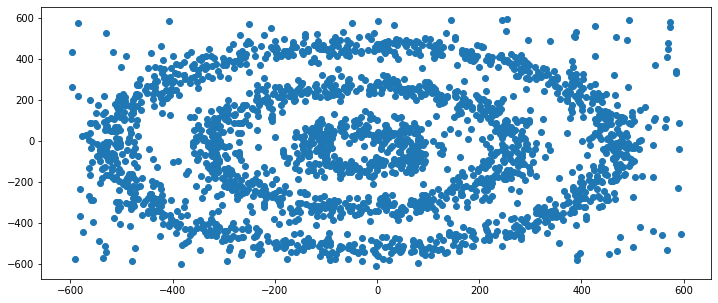

In [4]:
plt.figure(figsize = (12,5))
plt.scatter(df['0'],df['1'])

In [5]:
# Kmeans Clustering


In [6]:
from sklearn.cluster import KMeans

In [7]:
k = [1,2,3,4,5,6,7,8,9,10]
ssd = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Kmeans Clustering')

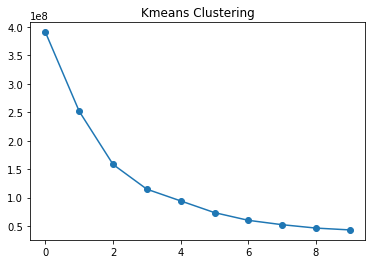

In [9]:
plt.plot(ssd,marker = 'o')
plt.title('Kmeans Clustering')

In [10]:
model = KMeans(n_clusters=4)
model.fit(df)
centroid = model.cluster_centers_

Text(0, 0.5, '1')

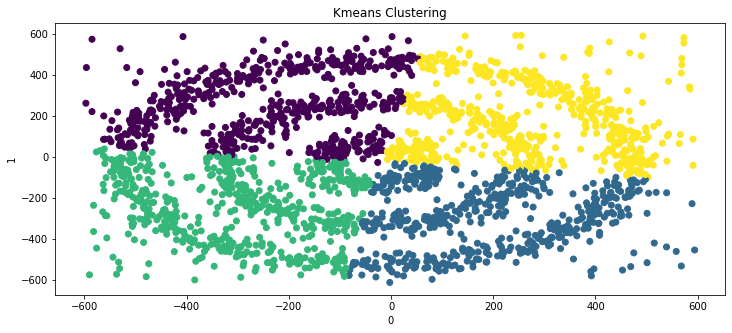

In [14]:
plt.figure(figsize = (12,5))
plt.title('Kmeans Clustering')
plt.scatter(df['0'],df["1"],c = model.labels_)
plt.xlabel('0')
plt.ylabel('1')

In [ ]:
# Agglomerative Clustering

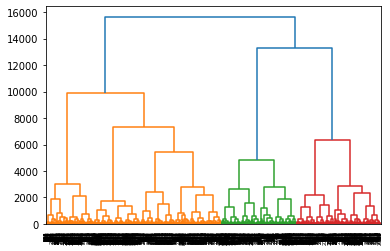

In [16]:
#Dendogram = 3 clusters
from scipy.cluster  import hierarchy
den = hierarchy.dendrogram(hierarchy.linkage(df,method='ward'))

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(df)

AgglomerativeClustering(n_clusters=3)

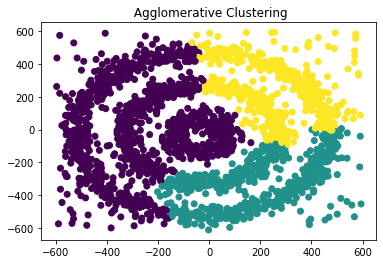

In [19]:
plt.title(' Agglomerative Clustering')
plt.scatter(df['0'],df['1'],c = model.labels_)

In [20]:
#DBSCAN

In [21]:
from sklearn.neighbors import NearestNeighbors

In [22]:
n = NearestNeighbors(n_neighbors=2)
n_fit = n.fit(df)
distance ,_ = n_fit.kneighbors(df)


In [23]:
distance.shape

(2300, 2)

In [24]:
distance

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

In [25]:
import numpy as np

distance = np.sort(distance,axis = 0)

In [26]:
distance

array([[  0.        ,   0.22379981],
       [  0.        ,   0.22379981],
       [  0.        ,   0.4722822 ],
       ...,
       [  0.        ,  77.02596965],
       [  0.        ,  79.        ],
       [  0.        , 125.89678312]])

Text(0, 0.5, 'Epsilon')

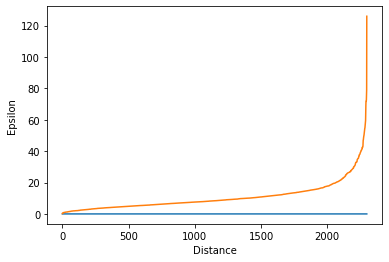

In [27]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('Epsilon')

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
model = DBSCAN(eps = 30,min_samples=3)
model.fit(df)

DBSCAN(eps=30, min_samples=3)

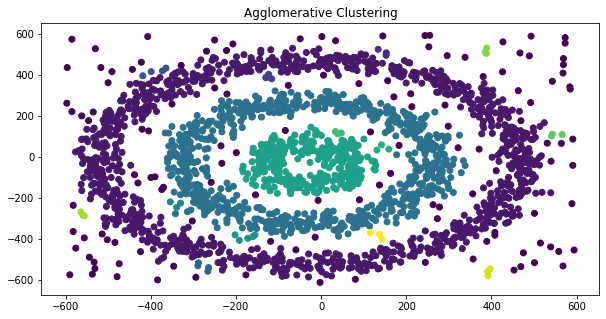

In [30]:
plt.figure(figsize = (10,5))
plt.title("Agglomerative Clustering")
plt.scatter(df["0"],df['1'],c = model.labels_)